<a href="https://colab.research.google.com/github/yuhith10/gitdemo1/blob/main/Netflix_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining Problem Statement and Analysing basic metrics

# 1.1 Importing Libraries and insert the Dataset

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/netflix.csv')


In [ ]:
#The code below show the first 5 records
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2. Basic Operations like shape, info, unique, missing values, statistical summary



In [ ]:
#The code below show the total shape of the dataset
df.shape

(8807, 12)

In [ ]:
#All attributes
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#The code below show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#The code below execute the count of unique values
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
#The code below execute summary of the distribution of the numerical data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Data cleaning - Data cleaning is the process of fixing or removing incorrect, incomplete, or irrelevant data from a dataset
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#Finding null value and replace "Not Available" in rating column
indices = df[df.rating.isna()].index
indices

Index([5989, 6827, 7312, 7537], dtype='int64')

In [ ]:
df.loc[indices , 'rating'] = 'Not Available'
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
#Dropping the null value from date_added column
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


In [ ]:
#Overall null values in each column of the dataset
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2624
cast,825
country,830
date_added,0
release_year,0
rating,0
duration,3


In [ ]:
#Missing values in duration column
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Replacing "Not Available" in duration column
indices = df[df.duration.isna()].index
indices

Index([5541, 5794, 5813], dtype='int64')

In [ ]:
df.loc[indices , 'duration'] = 'Not Available'
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,Not Available,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,Not Available,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,Not Available,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#Remaining null values
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2624
cast,825
country,830
date_added,0
release_year,0
rating,0
duration,0


# 3. Non-Graphical Analaysis

In [ ]:
# 2 types of contents - Movie and TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.duration.value_counts()

,count
duration,
90 min,152
94 min,146
93 min,146
97 min,146
91 min,144
...,...
212 min,1
8 min,1
186 min,1


In [ ]:
tv_shows.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,421
3 Seasons,198
4 Seasons,94
5 Seasons,64
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


In [ ]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [ ]:
tv_shows.duration_in_seasons

,duration_in_seasons
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
5,1 Season
...,...
8795,2 Seasons
8796,2 Seasons
8797,3 Seasons
8800,1 Season


In [ ]:
movies.duration_in_minutes

,duration_in_minutes
0,90 min
6,91 min
7,125 min
9,104 min
12,127 min
...,...
8801,96 min
8802,158 min
8804,88 min
8805,88 min


In [ ]:
#In which year the oldest and the most recent movie/TV show released on the Netflix dataset.
df.release_year.min() , df.release_year.max()

(1925, 2021)

In [ ]:
#Analysis of actors/directors of different types of shows/movies.
df['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [ ]:
#There are some movies which are directed by multiple directors and we create a new Director column for exploration
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb


,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [ ]:
dir_tb = dir_tb.explode('director')
dir_tb['director'] = dir_tb['director'].str.strip()

In [ ]:
#Count of unique directors
dir_tb['director'].nunique()

4993

In [ ]:
#Total movies and tv shows directed by each director
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [ ]:
#Understanding what content is available in different countries
genre_tb = df[['show_id' , 'type', 'listed_in']]
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

In [ ]:
#About Cast
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast_tb.cast.nunique()

39260

In [ ]:
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,6.0,24.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
Yuki Kaji,8.0,17.0
David Attenborough,6.0,14.0
...,...,...
Çağlar Çorumlu,1.0,NaN
Çetin Tekindor,1.0,NaN
İbrahim Büyükak,1.0,NaN


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

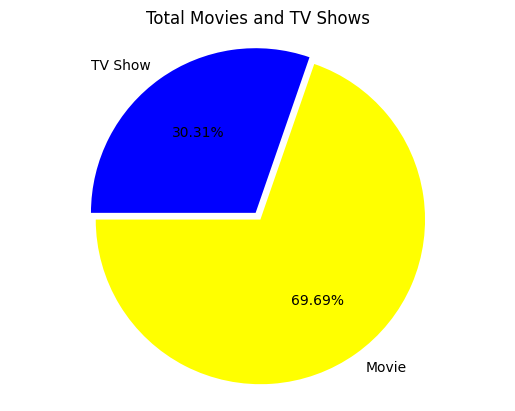

In [ ]:
#Distribution of content across the different types(Pie Chart)
types = df.type.value_counts()
plt.pie(types,explode=(0.025,0.025),  labels=types.index, autopct='%1.2f%%' , colors = ['yellow' , 'blue'], startangle=180)
plt.axis('equal')
plt.title('Total Movies and TV Shows')
plt.show()

In [ ]:
#How has the number of movies released per year changed over the last 20-30 years
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,379
116,TV Show,2019,397
117,TV Show,2020,436


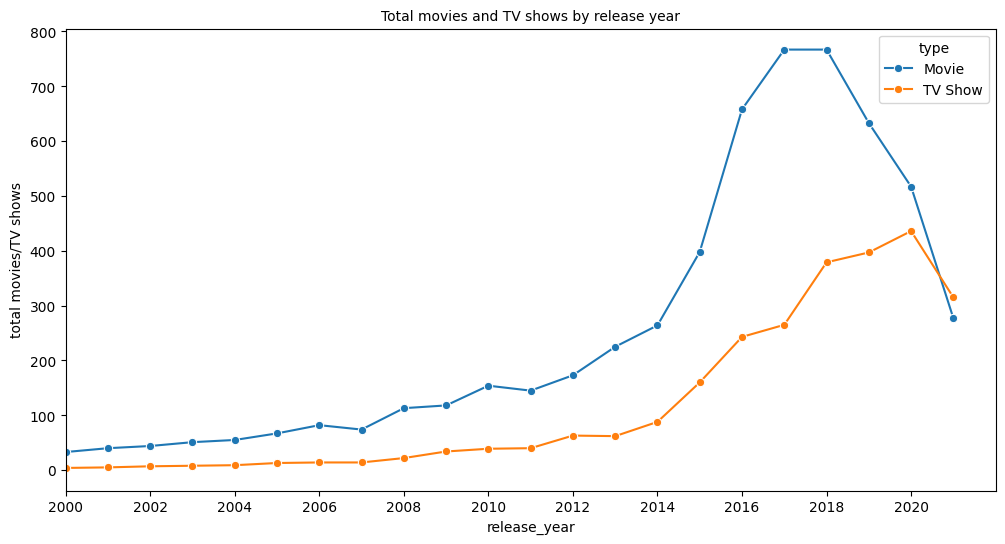

In [ ]:
#Distplot
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 10)
plt.ylabel('total movies/TV shows' , fontsize = 10)
plt.title('Total movies and TV shows by release year' , fontsize = 10)
plt.xlim( left = 2000 , right = 2022)
plt.xticks(np.arange(2000 , 2022 , 2))
plt.show()

In [ ]:
#CountPlot - Total Movies directed by top 5 directors
top_dir = dir_tb.director.value_counts().head(5).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_dir)]

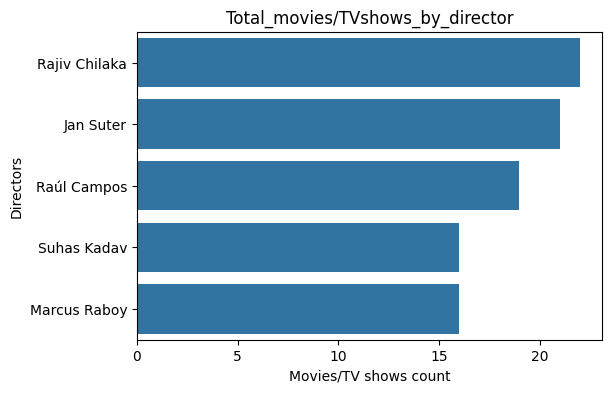

In [ ]:
plt.figure(figsize= (6 , 4))
sns.countplot(data = df_new , y = 'director' , order = top_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 10)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 10)
plt.title('Total_movies/TVshows_by_director')
plt.show()

In [ ]:
#Boxplot - Duration Distribution for Movies
movies_df = df[df.type.str.contains("Movie")]
movies_df['duration'] = movies_df['duration'].str.extract('(\d+)',expand=False).fillna(0).astype(int)


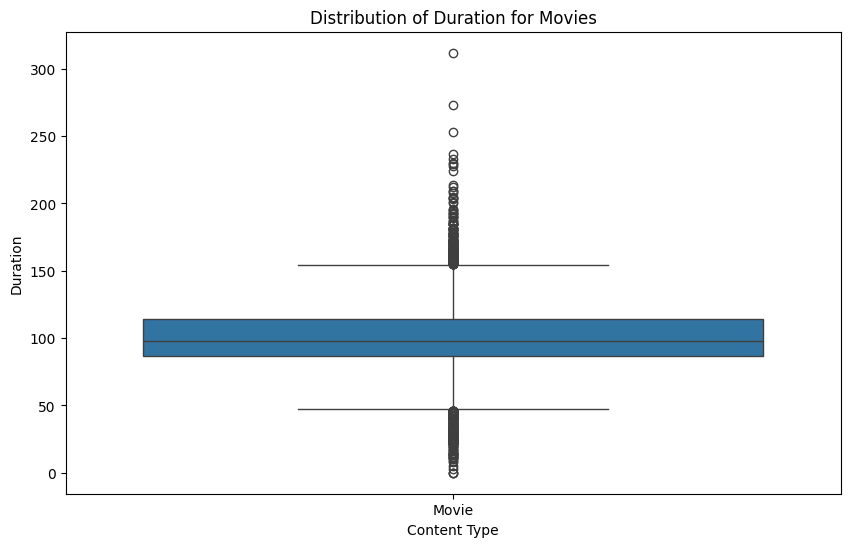

In [ ]:
# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

In [ ]:
#Heatmaps - Country-wise Rating of Content
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [ ]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Countries V/s Rating')

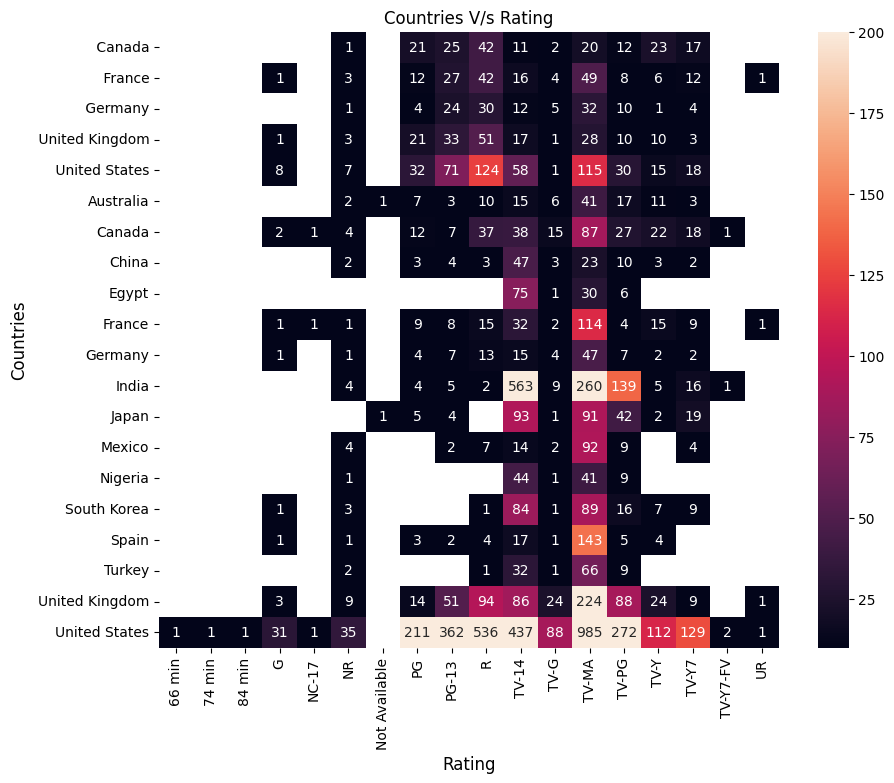

In [ ]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

(0.0, 100.0)

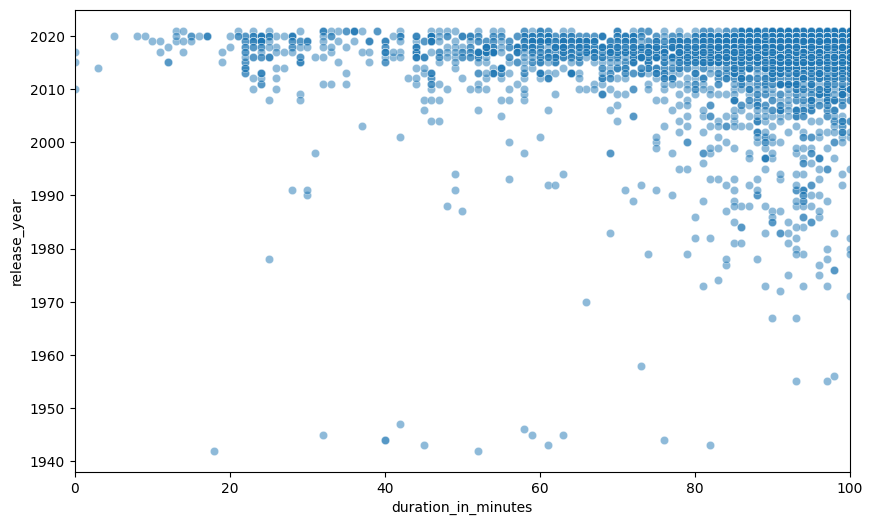

In [ ]:
#Pairplots - Variation in duration of movies by release year
plt.figure(figsize = (10,6))
sns.scatterplot(x=movies['duration_in_minutes'].str.extract('(\d+)',expand=False).fillna(0).astype(int), y=movies['release_year'],alpha=0.5)
plt.xlim((0,100))

# 5. Missing Values and Outlier


In [ ]:
#Missing Values
df.isna().any()

,0
show_id,False
type,False
title,False
director,True
cast,True
country,True
date_added,True
release_year,False
rating,True
duration,True


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.isna().sum().sum()

4307

In [ ]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Not Available", inplace=True)
df.isna().any()

,0
show_id,False
type,False
title,False
director,False
cast,False
country,False
date_added,True
release_year,False
rating,True
duration,True


In [ ]:
#Outlier Check
shows_df = df[df.type.str.contains("TV Show")]
shows_df['duration'] = df['duration'].str.extract('(\d+)',expand=False).fillna(0).astype(int)

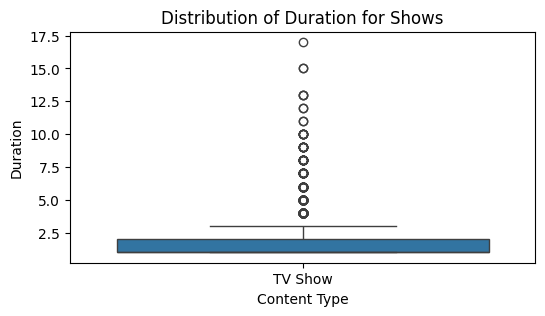

In [ ]:
# Creating a boxplot for movie duration
plt.figure(figsize=(6, 3))
sns.boxplot(shows_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Shows')
plt.show()

# 6. Insights based on Non-Graphical and Visual Analysis

1.	Around 69% content on Netflix is Movies and around 31% content is TV shows.
2.	The movies and TV shows uploaded on the Netflix started from the year 2008, and it had very lesser content till 2014.
3.	In the Year 2015, the drastic change in the content getting uploaded on Netflix and continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix.
4.	Netflix has movies from different kinds of directors and total of around 4528 directors.
5.	Netflix has movies from total 122 countries and, United States being the highest contributor with almost 37% of all the content.
6.	Ratings of content is available on Netflix, for the various viewers categories like kids, adults, and families. Highest number of movies and TV shows are rated as TV-MA (for mature audiences).
7.	International Movies and TV Shows, Dramas, and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
8.	Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
9.	Indian Actors have been acted in maximum movies on Netflix. Top 5 actors are in India based on quantity of movies.
10.	Shorter duration movies have been popular in last 10 years.


# 7. Business Insights

1. Quantity: Our analysis revealed that Netflix had added more movies than TV shows,
aligning with the expectation that movies dominate their content library.
2. Content Addition: July emerged as the month when Netflix adds the most content,
closely followed by December, indicating a strategic approach to content release.
3. Genre Correlation: Strong positive associations were observed between various
genres, such as TV dramas and international TV shows, romantic and international
TV shows, and independent movies and dramas. These correlations provide insights
into viewer preferences and content interconnections.
4. Movie Lengths: The analysis of movie durations indicated a peak around the 1960s,
followed by a stabilization around 100 minutes, highlighting a trend in movie lengths
over time.
5. TV Show Episodes: Most TV shows on Netflix have one season, suggesting a
preference for shorter series among viewers.
6. Common Themes: Words like love, life, family, and adventure were frequently found
in titles and descriptions, capturing recurring themes in Netflix content.
7. Rating Distribution: The distribution of ratings over the years offers insights into the
evolving content landscape and audience reception.
8. Data-Driven Insights: Our data analysis journey showcased the power of data in
unravelling the mysteries of Netflix’s content landscape, providing valuable insights
for viewers and content creators.
9. Continued Relevance: As the streaming industry evolves, understanding these
patterns and trends become increasingly essential for navigating the dynamic
landscape of Netflix and its vast library.
10. Happy Streaming: We hope this blog has been an enlightening and entertaining
journey into the world of Netflix, and we encourage you to explore the captivating
stories within its ever-changing content offerings.

# 8. Recommedations

1.	Netflix has to focus on TV Shows also because there are people who will like to see tv shows rather than movies.
2.	By approaching the top directors, we can plan some more movies/tv shows to increase the popularity.
3.	We have seen the greatest number of international movies genre and we need to give priority to other genres like Horror, Comedy and so on.
4.	In TV Shows we has to focus on thriller genre which will be helpful for having more number
of seasons.
5.	Most of the movies were released in OTT in the year 2019 and we need increasing
this value to attract the people by showing that subscription is worthful as Netflix is releasing more movies per year.
6.	Very limited genres are focused in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular. We can create such more country specific genres and it might also be liked across the world just like Japanese Anime.
7.	Mainly the release in OTT, should focus on the festival holidays and weekends which is to be mainly focused.
8.	Some movies can be released directly into OTT which has some positive talk and it helps to improve the subscriptions.
9.	We need to focus on an actor who has more following and make use of it by doing a TV Shows or web series.
10.	Advertisement in the country which has very less movies released should be increased and attract people of that country by making their native TV Shows.
11.	The country like India, which is highly populous, has maximum content available only in three rating TV-MA, TV-14, TV-PG. It is unlikely to serve below 14 age and above 35-year age group.


